<a href="https://colab.research.google.com/github/khizerismail89/Target-SQL-casestudy/blob/main/Business_Case_Scaler_Clustering_KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder # Label Encoder
from sklearn.preprocessing import MinMaxScaler # Min Max Scaling
from sklearn.preprocessing import StandardScaler # Standard Scaling
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# EDA steps

In [ ]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")

In [ ]:
df.head()

Unnamed: 0               company_hash  \
0           0             atrgxnnt xzaxv   
1           1  qtrxvzwt xzegwgbb rxbxnta   
2           2              ojzwnvwnxw vx   
3           3                  ngpgutaxv   
4           4                 qxen sqghu   

                                          email_hash  orgyear      ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  
3    Backend Engineer            2019.0  
4  FullStack Engineer            2019.0

In [ ]:
print(f"The shape of the dataframe is {df.shape[0]} rows X {df.shape[1]} columns.")

The shape of the dataframe is 205843 rows X 7 columns.


In [ ]:
#checking data types of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


We can observe that there are a lot of missing values in the columns 'company_hash', 'orgyear' and 'job_position'.

In [ ]:
# finding the statistical summary of the data frame
df.describe()

Unnamed: 0        orgyear           ctc  ctc_updated_year
count  205843.000000  205757.000000  2.058430e+05     205843.000000
mean   103273.941786    2014.882750  2.271685e+06       2019.628231
std     59741.306484      63.571115  1.180091e+07          1.325104
min         0.000000       0.000000  2.000000e+00       2015.000000
25%     51518.500000    2013.000000  5.300000e+05       2019.000000
50%    103151.000000    2016.000000  9.500000e+05       2020.000000
75%    154992.500000    2018.000000  1.700000e+06       2021.000000
max    206922.000000   20165.000000  1.000150e+09       2021.000000

In [ ]:
## removing the unnecessary column 'Unnamed: 0' which is Index of the dataset
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [ ]:
df.duplicated(subset = ['company_hash', 'email_hash']).value_counts()

False    160312
True      45531
Name: count, dtype: int64

We can observe that there are 45531 duplicated rows in the entire data frame. So in the next step we will delete them from the data frame.

In [ ]:
df = df.drop_duplicates(subset = ['company_hash', 'email_hash'])

In [ ]:
df.shape

(160312, 6)

In [ ]:
# finding duplicates after removing the duplicated values
df.duplicated(subset = ['company_hash', 'email_hash']).value_counts()

False    160312
Name: count, dtype: int64

In [ ]:
# checking out the NaN data after removing the duplicated data
df.isna().sum()

company_hash           39
email_hash              0
orgyear                83
ctc                     0
job_position        35857
ctc_updated_year        0
dtype: int64

In [ ]:
# conversion of categorical attributes to 'category'
df['job_position'] = df['job_position'].astype('category')
df['company_hash'] = df['company_hash'].astype('category')
df['email_hash'] = df['email_hash'].astype('category')

In [ ]:
# Defining the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Select numerical columns with missing values
num_cols = ['orgyear', 'ctc', 'ctc_updated_year']

# Apply KNN imputation
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

In [ ]:
# Most frequent imputation for categorical column usng simple imputer
categorical_column = ['job_position','company_hash',"email_hash"]
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_column] = most_frequent_imputer.fit_transform(df[categorical_column])

In [ ]:
# Check for missing values after imputation
df.isnull().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [ ]:
df.nunique()

company_hash         37299
email_hash          153443
orgyear                109
ctc                   3278
job_position           750
ctc_updated_year         7
dtype: int64

This data frame is having 153443 unique learners data who are from:

 37299 companies

 1016 unique job positions

 109 unique employement start years

 3360 unique CTCs

In [ ]:
#finding the dataframe details when all the data has been cleansed and we are good to start with our actual analysis and modeling
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160312 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      160312 non-null  object 
 1   email_hash        160312 non-null  object 
 2   orgyear           160312 non-null  float64
 3   ctc               160312 non-null  float64
 4   job_position      160312 non-null  object 
 5   ctc_updated_year  160312 non-null  float64
dtypes: float64(3), object(3)
memory usage: 8.6+ MB


In [ ]:
##Checking unique emails and frequency of occurrence of the same email hash in the data.
df['email_hash'].value_counts().head(10)

email_hash
db84980ad197f8eff08b14a3442ff57f6374ea780f2587b310aac54b6c32ee3a    3
6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af    2
719cd0ece4875bb8548d8da0a605d92ae08441e20e4e82be9a45db6e8e3812a4    2
e2462eba631d935ac6af51c00b0135359bfed630fbe605c17266183aeddaf850    2
40a314d11a7b3407cfc0a71155434911f055ce8927bbd74efb05861e72ec49f2    2
0e0b52e1fa76e607ca155769bbfb978c4dc91b7482df276817f3f31f0129c9b6    2
5861cb663a73291d709c2a9dfc70e973404512d2f85898a4a4c808a2df7cbf4b    2
23bbf4daf8969931f4dd16825943fc910093b77027625520dcf6b79df5cd5d8d    2
1cb251fa28ad525b852452a17fdfafd3ea733bb7d2f2526949ed8a39f58db04a    2
ea34c61cc80d5d526d1d754bb9ab219368a0212f937e2b7bc777526d75ab6fd4    2
Name: count, dtype: int64

By doing a random check on uniquness of email_hash column , we see that the email id of learners has been anonymously hashed against a unique email id and the rows are created based on different job positions added/when the CTC is updated.

In [ ]:
df[df['email_hash']=='db84980ad197f8eff08b14a3442ff57f6374ea780f2587b310aac54b6c32ee3a']

company_hash  \
4141    vqwotqct xzaxv ogrhnxgzo rxbxnta   
86713                     zgn vuurxwvmrt   
204379                          vqwotqct   

                                               email_hash  orgyear       ctc  \
4141    db84980ad197f8eff08b14a3442ff57f6374ea780f2587...   2020.0  700000.0   
86713   db84980ad197f8eff08b14a3442ff57f6374ea780f2587...   2020.0  400000.0   
204379  db84980ad197f8eff08b14a3442ff57f6374ea780f2587...   2020.0  700000.0   

              job_position  ctc_updated_year  
4141    FullStack Engineer            2021.0  
86713     Backend Engineer            2019.0  
204379    Backend Engineer            2021.0

In [ ]:
import re

# to remove special characters (e.g., non-alphanumeric characters). first defining
spl_char = '[^A-Za-z0-9\s]+'

# Clean the dataframe from special characters present in the dataset by using Regex
(re.sub(spl_char, '', name) for name in df.iterrows())
df.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                          email_hash  orgyear        ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000.0   

         job_position  ctc_updated_year  
0               Other            2020.0  
1  FullStack Engineer            2019.0  
2    Backend Engineer            2020.0  
3    Backend Engineer            2019.0  
4  FullStack Engineer            2019.0

In [ ]:
#Validating if the dataframe has any special character left
def has_special_character(s):
    special_characters = set('!@#$%^&*()_-+={[}]|\:;"\'<,>.?/~')
    return any(char in special_characters for char in s)

has_special_character(df)

False

In [ ]:
#ctc_updated_year_check
df['ctc_updated_year'] = df.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] <
                     x['orgyear'] else x['ctc_updated_year'], axis=1)

In [ ]:
#checking for outliers in orgyear
df.orgyear.value_counts().sort_values(ascending=True)

orgyear
200.0         1
2009.6        1
2014.2        1
201.0         1
1900.0        1
          ...  
2019.0    16232
2015.0    16597
2017.0    17438
2018.0    17996
2016.0    18163
Name: count, Length: 109, dtype: int64

In [ ]:
#removing outliers from orgyear using IQR

q1=df.orgyear.quantile(0.25)
q3=df.orgyear.quantile(0.75)
iqr=q3-q1

df=df.loc[(df.orgyear>=q1-1.5*iqr) & (df.orgyear<=q3+1.5*iqr)]


#removing outliers from ctc using IQR

q1=df.ctc.quantile(0.25)
q3=df.ctc.quantile(0.75)
iqr=q3-q1

df=df.loc[(df.ctc>=q1-1.5*iqr) & (df.ctc<=q3+1.5*iqr)]

In [ ]:
df.shape

(143021, 6)

In [ ]:
df[df['orgyear'] >=2025]

company_hash  \
10076                  xzegojo   
47041                  onhatzn   
61854           zgn vuurxwvmrt   
81633     nyt qtnyxzpsqghu xzw   
109201  zgn vuurxwvmrt vwwghzn   
111026                lvj vbmt   
120381                    zgzt   
168676          zgn vuurxwvmrt   
177309                  nhqxzs   
198187           xb  v onhatzn   

                                               email_hash  orgyear        ctc  \
10076   4c171381270155fb87b885f89cd71ca37ebbb8fd9da58b...   2025.0   360000.0   
47041   d10723760fe2ce3a9d4f1b84c63a1d38a17b5d66fa9b75...   2025.0  1000000.0   
61854   4cc83e05e427a5cfd9eac25033de8bbe0ff32fbb666d60...   2025.0   100000.0   
81633   2f479392893145db6c13fa5a9c02a1fd2bf263a81ebd79...   2025.0   120000.0   
109201  1bbb2680492c66c8ecae9e1870010e60374c1384c52132...   2025.0    56000.0   
111026  050a5f7e04009ad2554fe374e4512d9dbfd30450410666...   2025.0   150000.0   
120381  4a68eac053e18f91e64db2745bfdcb0644dde0a6299c40...   2025.0  1200000.0   
168676  b71f6709261c100b4fc05385e34b0746778ab0622bb9b5...   2025.0   100000.0   
177309  aa4591e10e82881eca015bbbfe7e19aa4e38e6bc18f129...   2025.0    42000.0   
198187  9429a19771ae913f169917d380c94f003115aaaf904388...   2025.0   300000.0   

              job_position  ctc_updated_year  
10076                Other            2025.0  
47041   Research Engineers            2025.0  
61854     Backend Engineer            2025.0  
81633   FullStack Engineer            2025.0  
109201    Backend Engineer            2025.0  
111026     Devops Engineer            2025.0  
120381  FullStack Engineer            2025.0  
168676    Backend Engineer            2025.0  
177309   Frontend Engineer            2025.0  
198187               Other            2025.0

In [ ]:
df['orgyear'] = np.where(df.orgyear >= 2025 , 2024, df['orgyear'])

In [ ]:
df[df['orgyear'] >=2025]

Empty DataFrame
Columns: [company_hash, email_hash, orgyear, ctc, job_position, ctc_updated_year]
Index: []

In [ ]:
#adding Years of Experience as a new feature to the dataframe
df['YOE'] = dt.now().year - df['orgyear']

# Univariate analysis

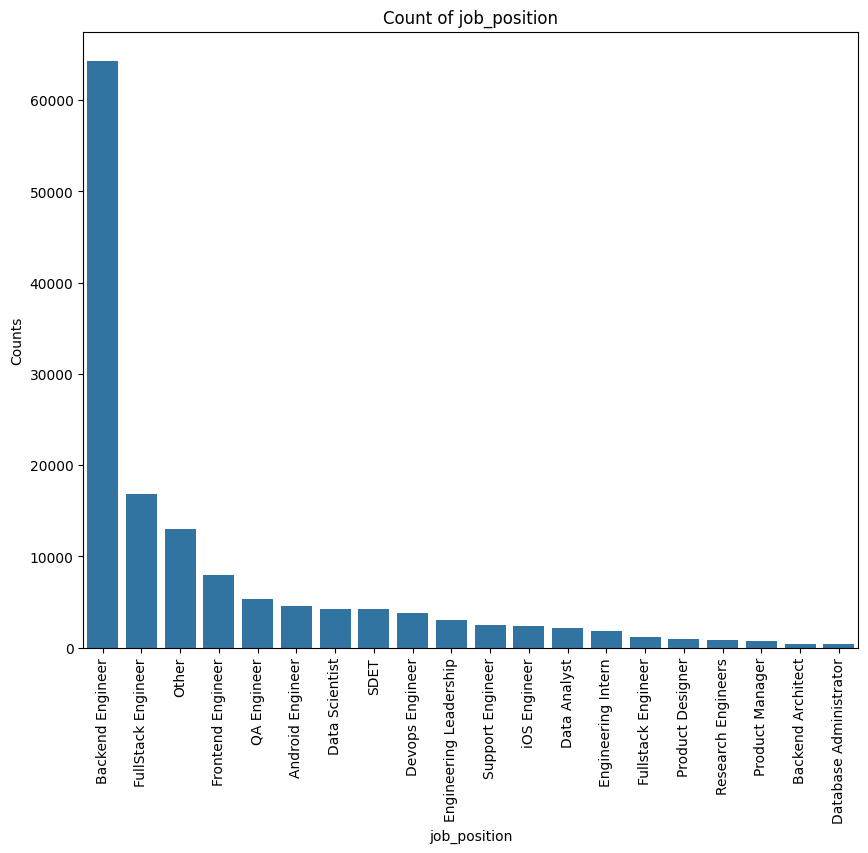

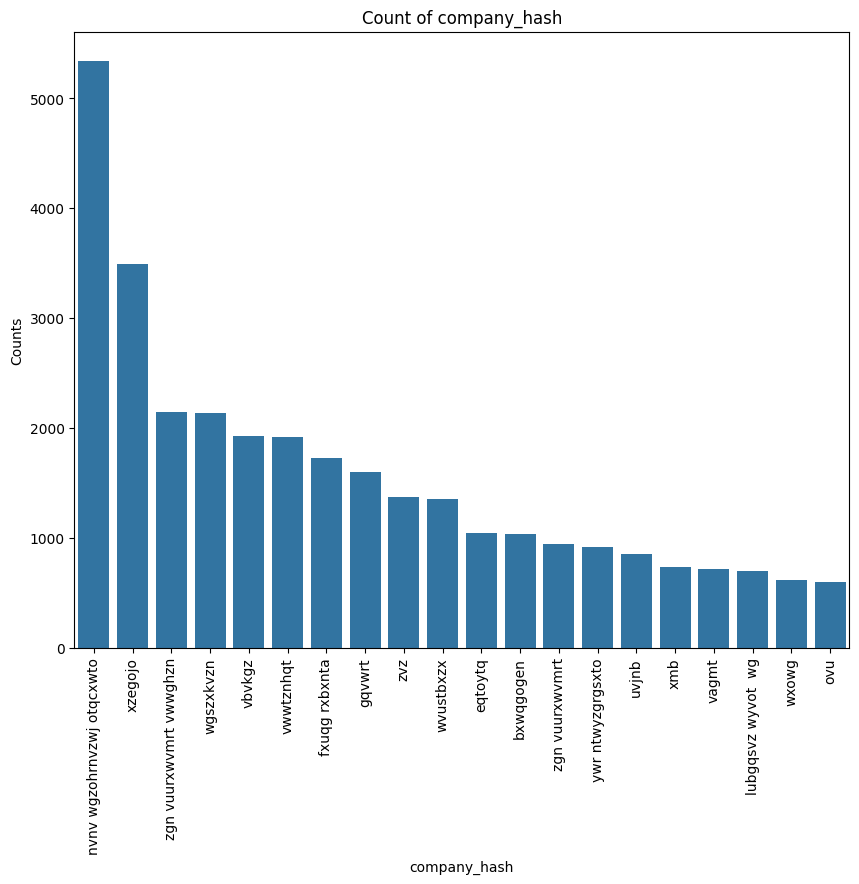

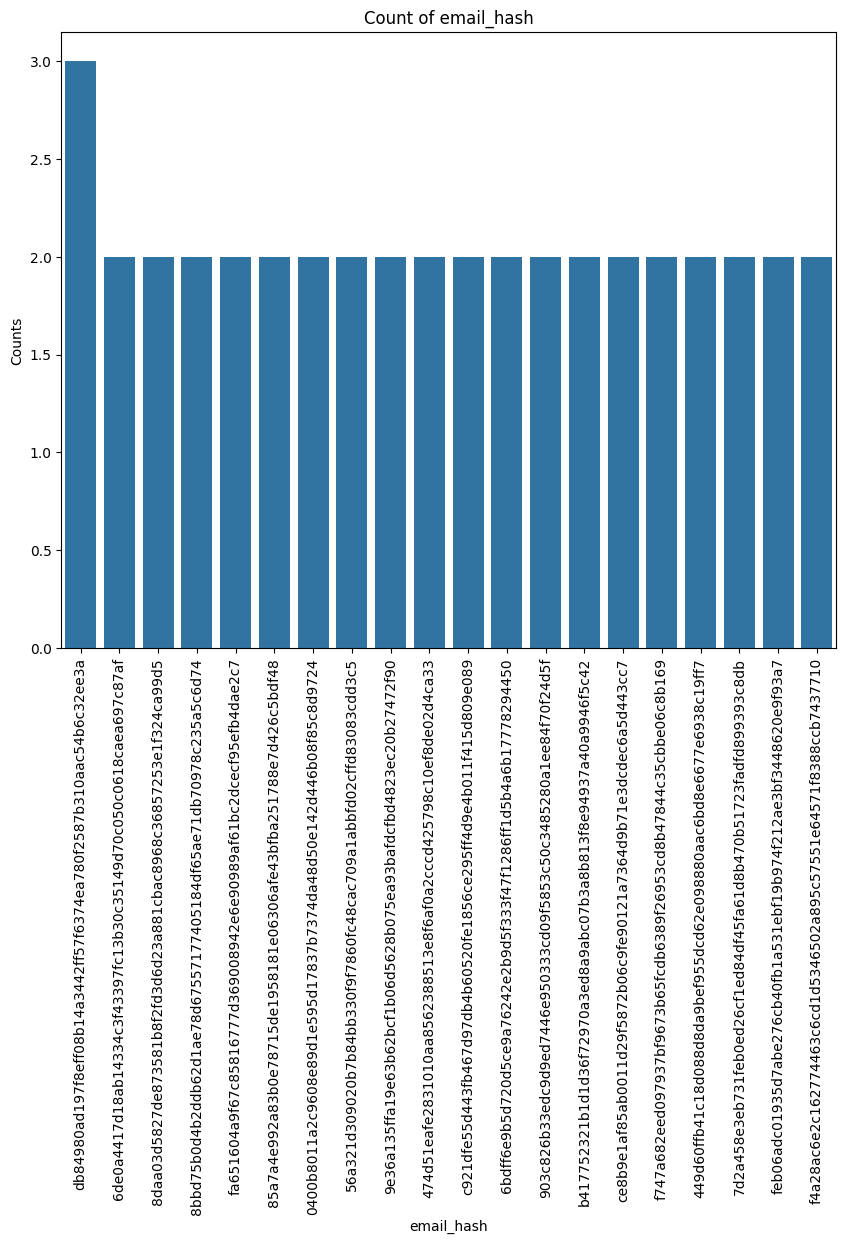

In [ ]:
# Plot countplots for categorical variables
for col in categorical_column:
    plt.figure(figsize=(10, 8))
    # If the column has many unique values, we plot only the top 20 most frequent categories
    data = df[col].value_counts().head(20)  # Top 20 categories
    sns.barplot(x=data.index, y=data.values)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

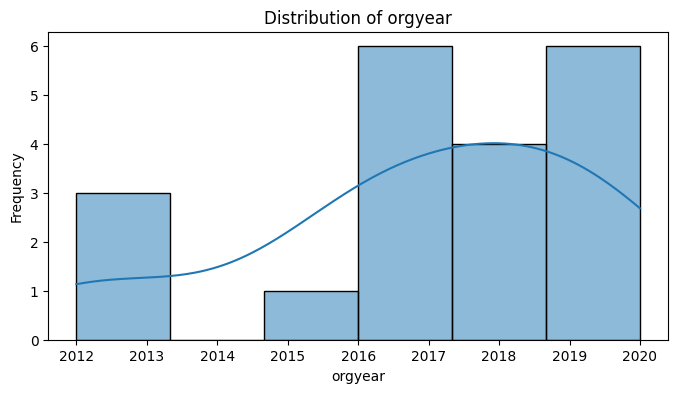

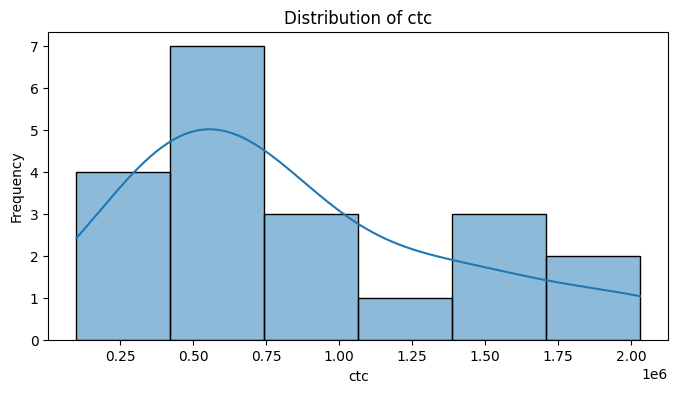

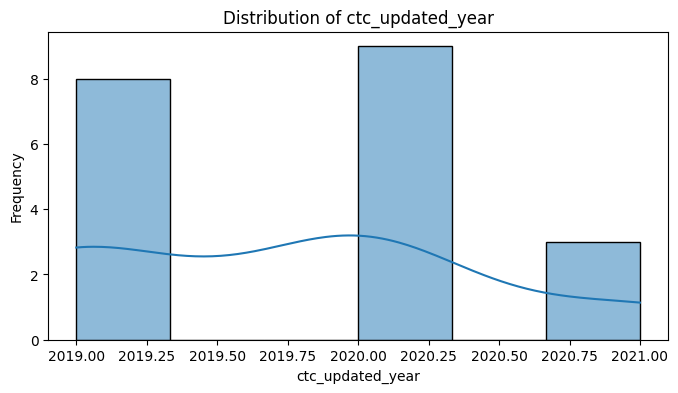

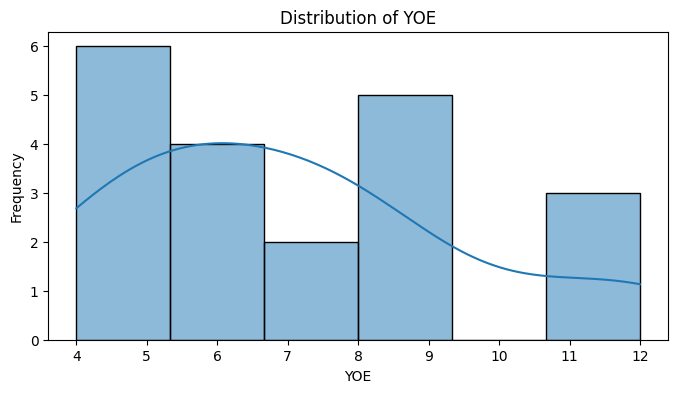

In [ ]:
# Plot distributions for continuous variables in the top 20 rows
continuous_vars = df.select_dtypes(include=np.number).columns
for col in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].head(20), kde=True)  # Using head(20) to limit to top 20 entries
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

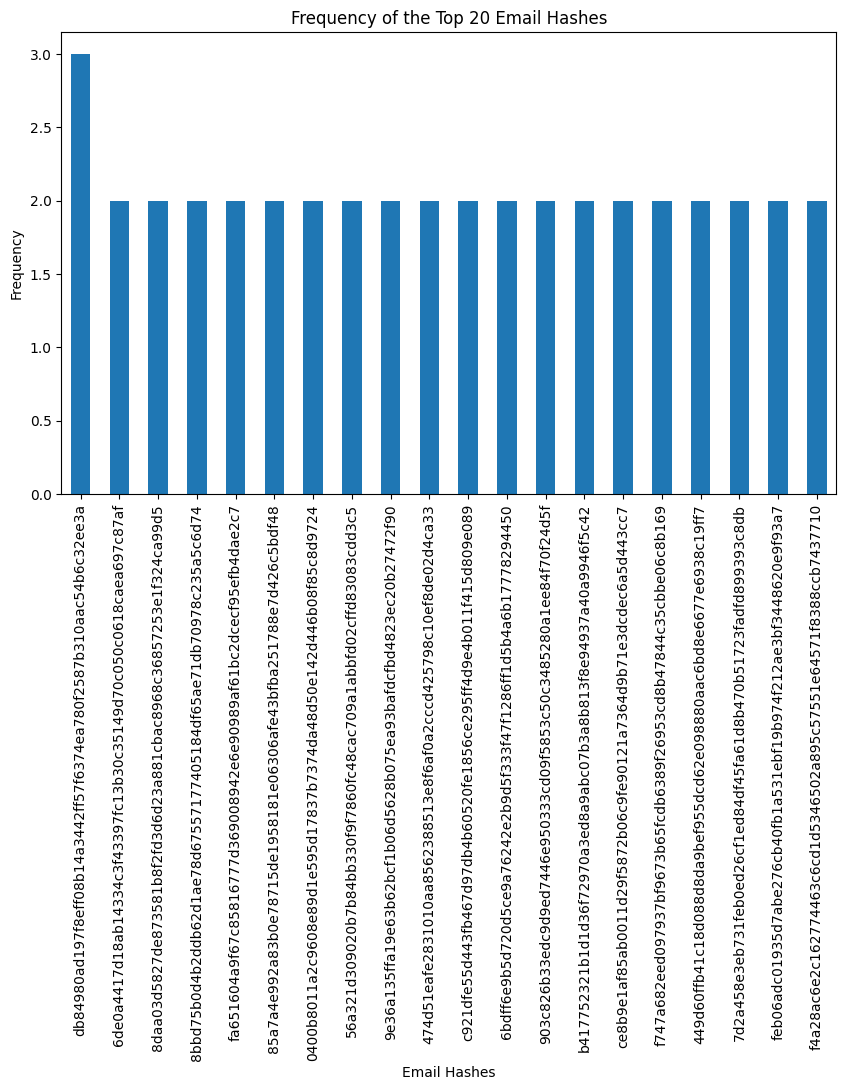

In [ ]:
# Plotting the frequency of the top 20 most common email hashes
plt.figure(figsize=(10, 6))
df['email_hash'].value_counts().head(20).plot(kind='bar')
plt.title('Frequency of the Top 20 Email Hashes')
plt.xlabel('Email Hashes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
grouped_df_comp_hash = df.groupby('company_hash')['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])
print(grouped_df_comp_hash.head(20))

                                         mean     median        max  \
company_hash                                                          
0                                1.000000e+05   100000.0   100000.0   
0000                             3.000000e+05   300000.0   300000.0   
01 ojztqsj                       5.500000e+05   550000.0   830000.0   
05mz exzytvrny uqxcvnt rxbxnta   1.100000e+06  1100000.0  1100000.0   
1                                1.750000e+05   175000.0   250000.0   
1 axsxnvro                       3.500000e+05   350000.0   350000.0   
1 jtvq                           1.180000e+06  1180000.0  1700000.0   
10 axsxnvr  ahmvx  rgzagz        1.300000e+06  1300000.0  1300000.0   
1000uqgltwn                      6.000000e+05   600000.0   600000.0   
1001 vuuo                        1.650000e+06  1650000.0  1650000.0   
100uxzo                          9.000000e+05   900000.0   900000.0   
103 onhaxgo ucn rna              3.200000e+05   320000.0   320000.0   
10dvx 

In [ ]:
#dropping email_hash column as it brings no value now after EDA
# df.drop(columns=['email_hash'],inplace=True)

# Manual Clustering
on the basis of learner’s company, job position and years of experience

In [ ]:
df.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                          email_hash  orgyear        ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000.0   

         job_position  ctc_updated_year  YOE  
0               Other            2020.0  8.0  
1  FullStack Engineer            2019.0  6.0  
2    Backend Engineer            2020.0  9.0  
3    Backend Engineer            2019.0  7.0  
4  FullStack Engineer            2019.0  7.0

In [ ]:
## Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience
Manual_clustering = df.groupby(['company_hash', 'job_position', 'YOE'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])

Manual_clustering = pd.DataFrame(Manual_clustering.reset_index())

Manual_clustering.columns = ['company_hash', 'job_position', 'YOE', 'Mean CTC', 'Median CTC', 'Max CTC', 'Min CTC', 'Count']

## Merging the same with original dataset carefully
merged_df_comp_job_yoe = pd.merge(df,Manual_clustering[['company_hash','Mean CTC', 'Median CTC', 'Max CTC', 'Min CTC', 'Count']], on = ['company_hash'], how = 'inner')

#sample view
merged_df_comp_job_yoe.head()

company_hash                                         email_hash  orgyear  \
0  atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0   
1  atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0   
2  atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0   
3  atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0   
4  atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0   

         ctc job_position  ctc_updated_year  YOE   Mean CTC  Median CTC  \
0  1100000.0        Other            2020.0  8.0   600000.0    600000.0   
1  1100000.0        Other            2020.0  8.0   500000.0    500000.0   
2  1100000.0        Other            2020.0  8.0  1000000.0   1000000.0   
3  1100000.0        Other            2020.0  8.0  1700000.0   1700000.0   
4  1100000.0        Other            2020.0  8.0  1771000.0   1771000.0   

     Max CTC    Min CTC  Count  
0   600000.0   600000.0      1  
1   500000.0   500000.0      1  
2  1000000.0  1000000.0      1  
3  1700000.0  1700000.0      1  
4  1771000.0  1771000.0      1

In [ ]:
print("len of df before remvoing duplicates: ", len(merged_df_comp_job_yoe))

len of df before remvoing duplicates:  9318352


In [ ]:
merged_df_comp_job_yoe = merged_df_comp_job_yoe.drop_duplicates(subset = ['company_hash', 'job_position', 'YOE'])

In [ ]:
print("len of df after remvoing duplicates: ", len(merged_df_comp_job_yoe))

len of df after remvoing duplicates:  82120


In [ ]:
## flag function to map the flag according to the condition
def flag_condition(ctc,mean_ctc):
    if ctc >= 2*mean_ctc:
      return 1
    elif mean_ctc >= ctc < 2*mean_ctc:
      return 2
    else:
      return 3

In [ ]:
merged_df_comp_job_yoe['designation'] = merged_df_comp_job_yoe.apply(lambda x: flag_condition(x['ctc'],x['Mean CTC']),axis=1)
merged_df_comp_job_yoe.head()

company_hash                                         email_hash  \
0   atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   
9   atrgxnnt xzaxv  a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...   
18  atrgxnnt xzaxv  ffc974693a2bfd0326c707d8460d6783861a9497e538e2...   
27  atrgxnnt xzaxv  b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...   
36  atrgxnnt xzaxv  0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...   

    orgyear        ctc      job_position  ctc_updated_year   YOE  Mean CTC  \
0    2016.0  1100000.0             Other            2020.0   8.0  600000.0   
9    2019.0   500000.0  Backend Engineer            2020.0   5.0  600000.0   
18   2017.0  1700000.0    Data Scientist            2020.0   7.0  600000.0   
27   2014.0  1000000.0  Backend Engineer            2018.0  10.0  600000.0   
36   2017.0   600000.0  Android Engineer            2021.0   7.0  600000.0   

    Median CTC   Max CTC   Min CTC  Count  designation  
0     600000.0  600000.0  600000.0      1            3  
9     600000.0  600000.0  600000.0      1            2  
18    600000.0  600000.0  600000.0      1            1  
27    600000.0  600000.0  600000.0      1            3  
36    600000.0  600000.0  600000.0      1            2

In [ ]:
round(merged_df_comp_job_yoe['designation'].value_counts(normalize = True)*100,2)

designation
2    67.63
3    19.50
1    12.86
Name: proportion, dtype: float64

In [ ]:
## Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]

Manual_clustering2 = df.groupby(['company_hash', 'job_position'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])

Manual_clustering2 = pd.DataFrame(Manual_clustering2.reset_index())

Manual_clustering2.columns = ['company_hash', 'job_position', 'Mean CTC', 'Median CTC', 'Max CTC', 'Min CTC', 'Count']


## merging original df with manually clustered_2 df with grouped by company and job position
merged_comp_job = pd.merge(df,Manual_clustering2[['company_hash','Mean CTC', 'Median CTC', 'Max CTC', 'Min CTC', 'Count']], on = ['company_hash'], how = 'inner')

## dropping duplicated rows
merged_comp_job = merged_comp_job.drop_duplicates(subset = ['company_hash', 'job_position','email_hash'])

#applying flag logic

merged_comp_job['class'] = merged_comp_job.apply(lambda x: flag_condition(x['ctc'],x['Mean CTC']),axis=1)

#sample view
merged_comp_job.head()

company_hash                                         email_hash  \
0   atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   
7   atrgxnnt xzaxv  a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...   
14  atrgxnnt xzaxv  ffc974693a2bfd0326c707d8460d6783861a9497e538e2...   
21  atrgxnnt xzaxv  b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...   
28  atrgxnnt xzaxv  0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...   

    orgyear        ctc      job_position  ctc_updated_year   YOE  Mean CTC  \
0    2016.0  1100000.0             Other            2020.0   8.0  600000.0   
7    2019.0   500000.0  Backend Engineer            2020.0   5.0  600000.0   
14   2017.0  1700000.0    Data Scientist            2020.0   7.0  600000.0   
21   2014.0  1000000.0  Backend Engineer            2018.0  10.0  600000.0   
28   2017.0   600000.0  Android Engineer            2021.0   7.0  600000.0   

    Median CTC   Max CTC   Min CTC  Count  class  
0     600000.0  600000.0  600000.0      1      3  
7     600000.0  600000.0  600000.0      1      2  
14    600000.0  600000.0  600000.0      1      1  
21    600000.0  600000.0  600000.0      1      3  
28    600000.0  600000.0  600000.0      1      2

In [ ]:
round(merged_comp_job['class'].value_counts(normalize = True) * 100,2)

class
2    63.73
3    27.60
1     8.67
Name: proportion, dtype: float64

In [ ]:
## Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]

Manual_clustering3 = df.groupby(['company_hash'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count'])

Manual_clustering3 = pd.DataFrame(Manual_clustering3.reset_index())

Manual_clustering3.columns = ['company_hash', 'Mean CTC', 'Median CTC', 'Max CTC', 'Min CTC', 'Count']


# # merging original df with manually clustered_3 df with grouped by company
merged_comp = pd.merge(df,Manual_clustering3[['company_hash', 'Mean CTC', 'Median CTC', 'Max CTC', 'Min CTC', 'Count']], on = ['company_hash'], how = 'inner')


# dropping duplicated rows
merged_comp_job = merged_comp_job.drop_duplicates(subset = ['company_hash','job_position','email_hash'])

# #applying flag logic
merged_comp['tier'] = merged_comp.apply(lambda x: flag_condition(x['ctc'],x['Mean CTC']),axis=1)

# #sample view
merged_comp.head()

company_hash                                         email_hash  orgyear  \
0  atrgxnnt xzaxv  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0   
1  atrgxnnt xzaxv  a309a8c6610af7e9f0a88cfb67f9a0095b0dde63475475...   2019.0   
2  atrgxnnt xzaxv  ffc974693a2bfd0326c707d8460d6783861a9497e538e2...   2017.0   
3  atrgxnnt xzaxv  b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...   2014.0   
4  atrgxnnt xzaxv  0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...   2017.0   

         ctc      job_position  ctc_updated_year   YOE      Mean CTC  \
0  1100000.0             Other            2020.0   8.0  1.115667e+06   
1   500000.0  Backend Engineer            2020.0   5.0  1.115667e+06   
2  1700000.0    Data Scientist            2020.0   7.0  1.115667e+06   
3  1000000.0  Backend Engineer            2018.0  10.0  1.115667e+06   
4   600000.0  Android Engineer            2021.0   7.0  1.115667e+06   

   Median CTC    Max CTC   Min CTC  Count  tier  
0   1070000.0  1771000.0  500000.0      9     2  
1   1070000.0  1771000.0  500000.0      9     2  
2   1070000.0  1771000.0  500000.0      9     3  
3   1070000.0  1771000.0  500000.0      9     2  
4   1070000.0  1771000.0  500000.0      9     2

In [ ]:
round(merged_comp.tier.value_counts(normalize = True)*100,2)

tier
2    64.48
3    31.94
1     3.59
Name: proportion, dtype: float64

In [ ]:
# Top 10 employees (earning more than most of the employees in the company) - Tier 1

top_10_tier_1_emp = merged_comp[merged_comp['tier'] ==1].sort_values(by='ctc', ascending = False).head(10)
top_10_tier_1_emp

company_hash  \
86392   pzgfrvqxnj  wrgha wgbbhzxwvnxgzo   
54323                                xmb   
77306        mzj btrrgz ntwyzgrgsj xzaxv   
85431                                hmo   
85459                                hmo   
16093                   ywr ntwyzgrgsxto   
19280                             vbvkgz   
88491                             shvcho   
131083                    tcvrhtotqctwgb   
116223                        qgrroqgjwt   

                                               email_hash  orgyear        ctc  \
86392   16b1fa1ce5dd5662b027416bc3b276c2e4ca47ec7815ac...   2012.0  3190000.0   
54323   741b9cd57939c037dd65122f2663213d67375bb542f389...   2016.0  3190000.0   
77306   f3718edd594ed2e6571aa5af6aca9e694cda8a3f247a61...   2020.0  3180000.0   
85431   a3dedc0dbcce732c8eaaa3e61ed1b0fc74da6ad045fe27...   2013.0  3180000.0   
85459   7ee42872bb2e3d9656518789b7369c995aa6e31a9014a2...   2006.0  3180000.0   
16093   ff15562f50620be8694e28da3c09061f3fe3b84a6ec8bd...   2010.0  3170000.0   
19280   8d3bfb8cb9be6576f1b2ae42a723558b926a447b3eb9d4...   2010.0  3170000.0   
88491   179b8b2d25455177dd90d77904a69f34fb8a535cd28360...   2007.0  3165000.0   
131083  cbf75033a2125342376f58e299a50f38203725f958e53d...   2021.0  3160000.0   
116223  486a9e22e8c2fcfa8ae4c35ac14cdcd6f26c5f906df449...   2010.0  3160000.0   

                  job_position  ctc_updated_year   YOE      Mean CTC  \
86392   Engineering Leadership            2021.0  12.0  1.096286e+06   
54323         Backend Engineer            2020.0   8.0  9.779303e+05   
77306         Backend Engineer            2020.0   4.0  1.202667e+06   
85431             Data Analyst            2021.0  11.0  1.535123e+06   
85459          Product Manager            2021.0  18.0  1.535123e+06   
16093         Backend Engineer            2021.0  14.0  8.153457e+05   
19280              QA Engineer            2016.0  14.0  1.476025e+06   
88491              QA Engineer            2017.0  17.0  1.560150e+06   
131083          Data Scientist            2021.0   3.0  1.540000e+06   
116223  Engineering Leadership            2019.0  14.0  1.490000e+06   

        Median CTC    Max CTC   Min CTC  Count  tier  
86392    1100000.0  3190000.0  360000.0     21     1  
54323     800000.0  3190000.0    4000.0    738     1  
77306    1200000.0  3180000.0   15000.0     24     1  
85431    1410000.0  3180000.0   10000.0     60     1  
85459    1410000.0  3180000.0   10000.0     60     1  
16093     700000.0  3170000.0    4560.0    914     1  
19280    1500000.0  3170000.0    2000.0   1928     1  
88491    1470000.0  3165000.0  240000.0     20     1  
131083   1470000.0  3160000.0  520000.0      5     1  
116223   1235000.0  3160000.0  940000.0      6     1

In [ ]:
# Top 10 employees of data science in each company earning more than their peers - Class 1

top_10_emp_data = merged_comp_job[merged_comp_job['job_position'].str.contains('Data ')
                                     & (merged_comp_job['class'] == 1)].sort_values(by='ctc', ascending = False).head(10)

top_10_emp_data

company_hash  \
1968565                   hmo   
1797467  oxtbtzo ytvrnyxzttqo   
14746      lubgqsvz wyvot  wg   
1795639               fvrbvqn   
1216854             vwwtznhqt   
2117727              xmb rvmo   
2057636               vzvqgwp   
763122               atrgxnnt   
1780203          xzntqcxtfmxn   
1785405         sgrabvz ovwyo   

                                                email_hash  orgyear  \
1968565  a3dedc0dbcce732c8eaaa3e61ed1b0fc74da6ad045fe27...   2013.0   
1797467  4622121de6aff55d96feb4f5c1f567276fcac3bcefed38...   2011.0   
14746    4c9aecdb9bbf326108be60c041c1e81958a1c009c95f60...   2006.0   
1795639  2b7750ad29a0be8abc36e63ccec1c0fc9586bd859d3631...   2017.0   
1216854  ba03144eec86b2513986417e69648ae8d9ef8190af2bd2...   2015.0   
2117727  7da7a23564f2f414fece17ce509c4745fafee30eb67774...   2020.0   
2057636  c2f5fc564c5aae9d0744a82dfbdafb12d3b8a00392e035...   2014.0   
763122   75f4167c21f7525295831947f6112b2ac1d34accee21ad...   2012.0   
1780203  0b3a9f1d175feb0d708e7e0f321992fbaeff3f8a8f010a...   2016.0   
1785405  540c52161f43bccb8f10506c2ae790bebb4f35c341af52...   2018.0   

               ctc    job_position  ctc_updated_year   YOE      Mean CTC  \
1968565  3180000.0    Data Analyst            2021.0  11.0  1.457369e+06   
1797467  3100000.0  Data Scientist            2021.0  13.0  1.040485e+06   
14746    3100000.0  Data Scientist            2019.0  18.0  9.925000e+05   
1795639  3100000.0  Data Scientist            2021.0   7.0  2.660000e+05   
1216854  3100000.0  Data Scientist            2021.0   9.0  4.066667e+05   
2117727  3100000.0  Data Scientist            2021.0   4.0  1.510000e+06   
2057636  3100000.0  Data Scientist            2020.0  10.0  1.537500e+06   
763122   3050000.0  Data Scientist            2020.0  12.0  1.500000e+06   
1780203  3000000.0  Data Scientist            2021.0   8.0  8.112507e+05   
1785405  3000000.0    Data Analyst            2020.0   6.0  8.000000e+05   

         Median CTC    Max CTC    Min CTC  Count  class  
1968565   1500000.0  3000000.0    10000.0     39      1  
1797467   1000000.0  1640000.0   550000.0     33      1  
14746     1105000.0  1700000.0    60000.0      4      1  
1795639    266000.0   400000.0   132000.0      2      1  
1216854    400000.0   600000.0   220000.0      3      1  
2117727   1500000.0  1950000.0  1080000.0      3      1  
2057636   1450000.0  3000000.0   250000.0      4      1  
763122    1500000.0  1500000.0  1500000.0      1      1  
1780203    785000.0  2600000.0        2.0     32      1  
1785405    800000.0   800000.0   800000.0      1      1

In [ ]:
# Bottom 10 employees of data science in each company earning less than their peers - Class 3

bottom_10_emp_data = merged_comp_job[merged_comp_job['job_position'].str.contains('Data ')
                                     & (merged_comp_job['class'] == 3)].sort_values(by='ctc', ascending = True).head(10)

bottom_10_emp_data

company_hash  \
2106591                zgqnytvontqz hzxctqoxnj   
2087383                             zvnxgzfxat   
2127093                                  btnxo   
2106840                                urhbxzw   
2104504                           wgbowgqt xzw   
2125043                             xzatrrxtzn   
2086676                              jvygg xzw   
1987003                    eqttrvzwt atctrgutq   
1261551                  ytdvfvqt ntwyzgrgsxto   
2078064  xzaxvz xzonxnhnt ge ntwyzgrgsj bvaqvo   

                                                email_hash  orgyear       ctc  \
2106591  66570945ebc4bb7dad62ceeff1ff0fff3c007e79146143...   2021.0   47000.0   
2087383  de7de05d12880d77826505f86b07ee83975fa92c68e565...   2016.0   80000.0   
2127093  87928a88e94e306901e85de2b3ce1d861c616a7ad0854e...   2014.0  120000.0   
2106840  89c50595727487bfa7d687bb168d2c2b55a57646876a4d...   2017.0  155000.0   
2104504  b43515409964a2090dc9efe1bf4a290cf542fbc7324c79...   2017.0  160000.0   
2125043  cafbe82bdd822f80cdf232311a09fb8d8c6ccdac5786f2...   2018.0  180000.0   
2086676  fcc1579e2ce8f73d261f6321c0bc1badd5ffa30a9ab6de...   2011.0  217000.0   
1987003  e1d73e6c063a5e89c78638b048dffa2bf45c819016300f...   2019.0  240000.0   
1261551  88a3d698328932cea20a92ec9d20ff425fe2c928e6011b...   2016.0  300000.0   
2078064  9a9451890d002a6ac90b4f8928aaf9cf996e2f3cebc3a6...   2008.0  350000.0   

           job_position  ctc_updated_year   YOE  Mean CTC  Median CTC  \
2106591    Data Analyst            2021.0   3.0   44240.0     44240.0   
2087383    Data Analyst            2018.0   8.0   75000.0     75000.0   
2127093  Data Scientist            2020.0  10.0   80000.0     80000.0   
2106840  Data Scientist            2018.0   7.0  140000.0    140000.0   
2104504  Data Scientist            2017.0   7.0   88000.0     88000.0   
2125043  Data Scientist            2019.0   6.0  145000.0    145000.0   
2086676  Data Scientist            2021.0  13.0  152000.0    152000.0   
1987003  Data Scientist            2019.0   5.0  205000.0    205000.0   
1261551  Data Scientist            2021.0   8.0  250000.0    250000.0   
2078064    Data Analyst            2020.0  16.0  275000.0    275000.0   

          Max CTC   Min CTC  Count  class  
2106591   52000.0   36480.0      2      3  
2087383   75000.0   75000.0      1      3  
2127093   80000.0   80000.0      1      3  
2106840  155000.0  125000.0      2      3  
2104504   88000.0   88000.0      1      3  
2125043  180000.0  110000.0      2      3  
2086676  152000.0  152000.0      1      3  
1987003  335000.0   75000.0      2      3  
1261551  250000.0  250000.0      1      3  
2078064  300000.0  250000.0      2      3

In [ ]:
# Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

bottom_10_emp = merged_comp[merged_comp['tier'] == 3].sort_values(by='ctc', ascending = True).head(10)

bottom_10_emp

company_hash                                         email_hash  \
140250                 xm  75357254a31f133e2d3870057922feddeba82b88056a07...   
104925  uqtu ntwyzgrgsxto  d9f0beb941744f9df7dd7ca4ae6486ae1c69d57a2de99a...   
132829           gutzoggi  7e6601095e73a9867259f9806cce29ec2527417ca9e076...   
130860            mrxzp22  d196c0c5bdb353343d06c7954262385c2dfd1a6421aafa...   
117675               mlxn  63220cc7ba979aac174db517064fb6dc7002461e5e0296...   
81240           xzntqntwy  26102efa1edc4ba0e5feec587664babe5a6508386b569b...   
117596     agwngq ftm rna  91e54946b34d8ad4f1a50f6fcb7c9104bac043d3ba8169...   
119996            xz rgwg  66573ebeb4fcfc496d2af1548a18a62ec3a48dae59d1cc...   
125006               xmtd  68071ee5df5210fe9264fbad4609a751ad30dbe6fc05fc...   
111970        mvzztqozvwp  3f822b10c7eec5e57b472b742e94a9b1abb51c43e0a10c...   

        orgyear      ctc            job_position  ctc_updated_year   YOE  \
140250   2019.0     16.0        Backend Engineer            2019.0   5.0   
104925   2016.0   2400.0      FullStack Engineer            2019.0   8.0   
132829   2012.0   9500.0            iOS Engineer            2016.0  12.0   
130860   2018.0  12000.0        Backend Engineer            2018.0   6.0   
117675   2015.0  15000.0        Backend Engineer            2017.0   9.0   
81240    2010.0  15000.0        Backend Engineer            2019.0  14.0   
117596   2010.0  15000.0       Frontend Engineer            2017.0  14.0   
119996   2016.0  16000.0        Backend Engineer            2016.0   8.0   
125006   2016.0  20000.0        Backend Engineer            2021.0   8.0   
111970   2014.0  25000.0  Engineering Leadership            2017.0  10.0   

            Mean CTC  Median CTC  Max CTC  Min CTC  Count  tier  
140250     15.500000        15.5     16.0     15.0      2     3  
104925   1800.000000      1800.0   2400.0   1200.0      2     3  
132829   6450.000000      6450.0   9500.0   3400.0      2     3  
130860  10500.000000     10500.0  12000.0   9000.0      2     3  
117675  12666.666667     12000.0  15000.0  11000.0      3     3  
81240    9000.000000      9000.0  15000.0   3000.0      2     3  
117596  12500.000000     12500.0  15000.0  10000.0      2     3  
119996  15500.000000     15500.0  16000.0  15000.0      2     3  
125006  19666.666667     20000.0  27000.0  12000.0      3     3  
111970  24500.000000     24500.0  25000.0  24000.0      2     3

In [ ]:
# Top 10 employees in each company - X department - having 5 years of experience earning more than their peers - Tier X

top_10_emp_5_YOE = merged_comp[merged_comp['YOE'] == 5].sort_values(by='ctc', ascending = False).head(10)

top_10_emp_5_YOE



company_hash                                         email_hash  \
69365      sgrabvz ovwyo  07f0d0309bc37d5f04718dae5220f99f7c0dee026f4e9d...   
69250      sgrabvz ovwyo  2bcb0bae3fadedcf61845c19c1500ff73f703f4d8fb295...   
119943  wyqgbv exrb wxnj  7204d2f3c3290e440c3d4e9bf26212d7d05c17d0749877...   
109158     xxn yjatqvmva  4d9be2f4f674f70ec474fcb1c50922dfc1bf9e41fed751...   
71941         ovrtoegqwt  f1eef93979e319c5a54bc3dd144b9c95f1ce46b9829ca4...   
118241            vbkvgz  ec905f0e18aaf283a2c39652387935f33116eb5a1f97f2...   
69408      sgrabvz ovwyo  e84b4c58a40a682bde7abb3d1b6bc7578956ad5201dddf...   
59724            onhatzn  8c3ccf577d56a8f4c3f20c6c2a63a0e1268da39c189152...   
45857     x vb v onhatzn  c7046201d284798036b6629fcbe83aa18b1fd8689d7144...   
80070             sggsrt  5d945d202f687ee55b925d0a8dbe0012742e2f05a0db58...   

        orgyear        ctc        job_position  ctc_updated_year  YOE  \
69365    2019.0  3150000.0    Backend Engineer            2020.0  5.0   
69250    2019.0  3150000.0               Other            2019.0  5.0   
119943   2019.0  3150000.0    Backend Engineer            2019.0  5.0   
109158   2019.0  3150000.0    Backend Engineer            2019.0  5.0   
71941    2019.0  3150000.0    Backend Engineer            2019.0  5.0   
118241   2019.0  3150000.0               Other            2019.0  5.0   
69408    2019.0  3150000.0    Backend Engineer            2019.0  5.0   
59724    2019.0  3150000.0    Backend Engineer            2019.0  5.0   
45857    2019.0  3150000.0  Engineering Intern            2019.0  5.0   
80070    2019.0  3150000.0    Backend Engineer            2019.0  5.0   

            Mean CTC  Median CTC    Max CTC    Min CTC  Count  tier  
69365   2.018884e+06   2160000.0  3190000.0     1000.0    405     3  
69250   2.018884e+06   2160000.0  3190000.0     1000.0    405     3  
119943  3.150000e+06   3150000.0  3150000.0  3150000.0      1     2  
109158  1.408250e+06   1144000.0  3150000.0   100000.0     20     1  
71941   1.692330e+06   1800000.0  3150000.0    30000.0    109     3  
118241  3.150000e+06   3150000.0  3150000.0  3150000.0      1     2  
69408   2.018884e+06   2160000.0  3190000.0     1000.0    405     3  
59724   9.875918e+05    800000.0  3150000.0     1000.0    474     1  
45857   1.058913e+06    715000.0  3150000.0    30000.0     46     1  
80070   1.541524e+06   1700000.0  3150000.0     2100.0    250     1

In [ ]:
# Top 10 employees in each company - X department - having 6 years of experience earning more than their peers - Tier X

top_10_emp_6_YOE = merged_comp[merged_comp['YOE'] == 6].sort_values(by='ctc', ascending = False).head(10)

top_10_emp_6_YOE

company_hash  \
23815                                               vagmt   
34595               ovbohzs qa xzonxnhnt xzaxv  mvzsvrgqt   
104778  yvuuvj  tdutzot bvzvstbtzn ogrhnxgz egq mhoxzt...   
52147                                            erxupvqn   
85748                                            wgytoxnj   
69385                                       sgrabvz ovwyo   
64999                                           bxwqgogen   
64803                                           bxwqgogen   
137269          zvnxgzvr xzonxnhnt ge ntwyzgrgsj fvqvzsvr   
24325                                               vagmt   

                                               email_hash  orgyear        ctc  \
23815   c5890c90ddaabb50ee4597d3ed5e85ce66c1b0f10db4f2...   2018.0  3160000.0   
34595   b171126642cdd87181ad1e6ed13127ef44e23f257b40da...   2018.0  3160000.0   
104778  2091282f2ca862c64fb2c631076c11d19e43394aed22de...   2018.0  3160000.0   
52147   e4ce9708e46af55476dfd703f10df47f76cc5dd457cbcf...   2018.0  3150000.0   
85748   209ae4abe92c8e2d2d7db8b96e2aeece3aa90afeee0dba...   2018.0  3150000.0   
69385   c83012638fee0370e04b4ee79a2d8e4cdcf2c1c848abca...   2018.0  3150000.0   
64999   274da8573e97ce3c603b9586efffcc313286ef77302f56...   2018.0  3150000.0   
64803   f0345a6032c13a3f7f5089f68cd948cb599d4173ec9cee...   2018.0  3150000.0   
137269  978dd057d16bce089a7251a882373c8fe116657194dedd...   2018.0  3150000.0   
24325   e0e645a7a253bb3250abf8e3d4dfc786b6c7920cc95a4f...   2018.0  3150000.0   

              job_position  ctc_updated_year  YOE      Mean CTC  Median CTC  \
23815      Devops Engineer            2019.0  6.0  1.851039e+06   1900000.0   
34595     Backend Engineer            2020.0  6.0  1.703386e+06   1720000.0   
104778               Other            2020.0  6.0  1.282759e+06   1200000.0   
52147     Backend Engineer            2019.0  6.0  1.965801e+06   2200000.0   
85748     Backend Engineer            2021.0  6.0  2.341905e+06   2400000.0   
69385                Other            2019.0  6.0  2.018884e+06   2160000.0   
64999   FullStack Engineer            2021.0  6.0  1.838034e+06   2000000.0   
64803   FullStack Engineer            2019.0  6.0  1.838034e+06   2000000.0   
137269               Other            2019.0  6.0  2.475000e+06   2475000.0   
24325     Backend Engineer            2019.0  6.0  1.851039e+06   1900000.0   

          Max CTC    Min CTC  Count  tier  
23815   3190000.0     8000.0    714     3  
34595   3160000.0    15200.0    529     3  
104778  3160000.0   180000.0     29     1  
52147   3190000.0    13000.0    532     3  
85748   3150000.0   800000.0     21     3  
69385   3190000.0     1000.0    405     3  
64999   3170000.0     5000.0   1038     3  
64803   3170000.0     5000.0   1038     3  
137269  3150000.0  1800000.0      2     3  
24325   3190000.0     8000.0    714     3

In [ ]:
# Top 10 employees in each company - X department - having 7 years of experience earning more than their peers - Tier X

top_10_emp_7_YOE = merged_comp[merged_comp['YOE'] == 7].sort_values(by='ctc', ascending = False).head(10)

top_10_emp_7_YOE

company_hash                                         email_hash  \
69236   sgrabvz ovwyo  87ab7572b9d2b5de54737f54ecb4c5be6e0899eadedcfc...   
91984         kowvrtq  71bf3d5a2bd56fa02e4e8bc1dca5b7d311dc290e21ced4...   
45544          ihmgrt  c95c9eb3e2df484a08682557e5a826282b1f2466d31d7d...   
12388         xzegojo  12291a03da640a869afa089e167e16d7ec7a6f1d94f0db...   
98142       ohuqavxrj  da6c75e3a063ab7642f4a38b8e367d76128045705e8d81...   
104065      nqvctrgpv  6d3cf99983985470f9f9659f82820f0c43fd0cc84239ef...   
108273      tzctonztn  c5157859fee35491b9a3b0e78e635853386cf20ae7c71b...   
91572           tontt  814506251957f47a2fa405c5ec70eb5ba1fd25c2c9b1ac...   
84420     ntpxgz wgqu  522e9dd6872002b398de2c04fb8703b1dfb7c468a2dd36...   
140675       egoyg nc  8e1f56803cb08469c18db5edd5496b1b17665607e4482a...   

        orgyear        ctc        job_position  ctc_updated_year  YOE  \
69236    2017.0  3190000.0  FullStack Engineer            2020.0  7.0   
91984    2017.0  3150000.0    Backend Engineer            2021.0  7.0   
45544    2017.0  3150000.0     Devops Engineer            2020.0  7.0   
12388    2017.0  3150000.0               Other            2017.0  7.0   
98142    2017.0  3150000.0    Backend Engineer            2020.0  7.0   
104065   2017.0  3150000.0  FullStack Engineer            2020.0  7.0   
108273   2017.0  3150000.0    Backend Engineer            2020.0  7.0   
91572    2017.0  3120000.0      Data Scientist            2019.0  7.0   
84420    2017.0  3100000.0   Frontend Engineer            2021.0  7.0   
140675   2017.0  3100000.0          Co-founder            2020.0  7.0   

            Mean CTC  Median CTC    Max CTC    Min CTC  Count  tier  
69236   2.018884e+06   2160000.0  3190000.0     1000.0    405     3  
91984   1.330789e+06   1200000.0  3150000.0   100000.0     19     1  
45544   2.106769e+06   2200000.0  3154000.0    40000.0     52     3  
12388   5.937883e+05    500000.0  3150000.0     3250.0   3490     1  
98142   2.305000e+06   2725000.0  3150000.0   740000.0      8     3  
104065  1.632731e+06   1550000.0  3150000.0    16000.0     52     3  
108273  1.196255e+06    950000.0  3150000.0     9000.0    137     1  
91572   2.178333e+06   2375000.0  3120000.0   200000.0      6     3  
84420   1.700037e+06   1500000.0  3100000.0     1800.0     49     3  
140675  3.100000e+06   3100000.0  3100000.0  3100000.0      1     2

In [ ]:
# Top 10 companies (based on their CTC)

top_10_comp_ctc = merged_comp.sort_values('ctc', ascending = False).head(10)
top_10_comp_ctc

company_hash  \
24427                             vagmt   
82402                          qxuurxzs   
67857                    tzuyvot tztqsj   
86392  pzgfrvqxnj  wrgha wgbbhzxwvnxgzo   
69236                     sgrabvz ovwyo   
82277                         vnrvooxvz   
68360      grv vzx ntwyzgrgsxto ucn rna   
52269                          erxupvqn   
54323                               xmb   
85459                               hmo   

                                              email_hash  orgyear        ctc  \
24427  a1286c6f6e363d7f263552758d828a9929da093830f174...   2010.0  3190000.0   
82402  c1bbf9d1240f0bfab26231cdde96b084a76aa8b4d37664...   2016.0  3190000.0   
67857  a9728225cad3fd037fe020ea0dc0fb8a97edbf558cd8ed...   2020.0  3190000.0   
86392  16b1fa1ce5dd5662b027416bc3b276c2e4ca47ec7815ac...   2012.0  3190000.0   
69236  87ab7572b9d2b5de54737f54ecb4c5be6e0899eadedcfc...   2017.0  3190000.0   
82277  610c95de4f8500c7dc5a25754bb76ca4581bd62c2b58ad...   2013.0  3190000.0   
68360  37ca9cb8d499378745162991d5e99049cb150fdbd71385...   2013.0  3190000.0   
52269  03ac1736aeae95c93feda3c22650a2dd1e89b575f5e56f...   2016.0  3190000.0   
54323  741b9cd57939c037dd65122f2663213d67375bb542f389...   2016.0  3190000.0   
85459  7ee42872bb2e3d9656518789b7369c995aa6e31a9014a2...   2006.0  3180000.0   

                 job_position  ctc_updated_year   YOE      Mean CTC  \
24427            Data Analyst            2019.0  14.0  1.851039e+06   
82402        Backend Engineer            2019.0   8.0  1.632440e+06   
67857                   Other            2020.0   4.0  2.024000e+06   
86392  Engineering Leadership            2021.0  12.0  1.096286e+06   
69236      FullStack Engineer            2020.0   7.0  2.018884e+06   
82277        Backend Engineer            2020.0  11.0  2.088462e+06   
68360        Backend Engineer            2020.0  11.0  1.645988e+06   
52269      FullStack Engineer            2020.0   8.0  1.965801e+06   
54323        Backend Engineer            2020.0   8.0  9.779303e+05   
85459         Product Manager            2021.0  18.0  1.535123e+06   

       Median CTC    Max CTC   Min CTC  Count  tier  
24427   1900000.0  3190000.0    8000.0    714     3  
82402   1500000.0  3190000.0   11250.0     21     3  
67857   2400000.0  3190000.0  500000.0      5     3  
86392   1100000.0  3190000.0  360000.0     21     1  
69236   2160000.0  3190000.0    1000.0    405     3  
82277   2175000.0  3190000.0   70000.0     26     3  
68360   1530000.0  3190000.0   11000.0    313     3  
52269   2200000.0  3190000.0   13000.0    532     3  
54323    800000.0  3190000.0    4000.0    738     1  
85459   1410000.0  3180000.0   10000.0     60     1

In [ ]:
#Top 2 positions in every company (based on their CTC)
top_2_job_comp = merged_comp.sort_values(by=['company_hash', 'ctc'], ascending=[True, False]).groupby('company_hash').head(2)

top_2_job_comp

company_hash  \
74171                                0   
142110                            0000   
116045                      01 ojztqsj   
116046                      01 ojztqsj   
126383  05mz exzytvrny uqxcvnt rxbxnta   
...                                ...   
116050     zyvzwt wgzohrnxzs tzsxzttqo   
80859                               zz   
80860                               zz   
120611    zzb ztdnstz vacxogqj ucn rna   
130019                          zzgato   

                                               email_hash  orgyear        ctc  \
74171   e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...   2020.0   100000.0   
142110  b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...   2017.0   300000.0   
116045  e1e15fada844f35fcc33927343d0c80f55526b87c40eee...   2011.0   830000.0   
116046  819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...   2016.0   270000.0   
126383  4702229ffb6968c87b16fc57e730769e554184e322e111...   2019.0  1100000.0   
...                                                   ...      ...        ...   
116050  49df7e15dae1895709b1c5c3a58008243f914f7ca54186...   2012.0   940000.0   
80859   7d4588453bc463b39db8c77ef0f856957fc42f5d54cae4...   2013.0  1370000.0   
80860   d6923a6f81c7b36615d9f14349fe01aec442029b2c502f...   2009.0   500000.0   
120611  ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   2017.0   600000.0   
130019  d421e52125f8057c65fa554752be03b056221c8590ff26...   2014.0   130000.0   

              job_position  ctc_updated_year   YOE   Mean CTC  Median CTC  \
74171     Backend Engineer            2020.0   4.0   100000.0    100000.0   
142110               Other            2020.0   7.0   300000.0    300000.0   
116045   Frontend Engineer            2019.0  13.0   550000.0    550000.0   
116046    Android Engineer            2019.0   8.0   550000.0    550000.0   
126383    Backend Engineer            2021.0   5.0  1100000.0   1100000.0   
...                    ...               ...   ...        ...         ...   
116050   Frontend Engineer            2019.0  12.0   940000.0    940000.0   
80859                Other            2020.0  11.0   935000.0    935000.0   
80860     Backend Engineer            2021.0  15.0   935000.0    935000.0   
120611  FullStack Engineer            2021.0   7.0   600000.0    600000.0   
130019    Backend Engineer            2017.0  10.0   130000.0    130000.0   

          Max CTC    Min CTC  Count  tier  
74171    100000.0   100000.0      1     2  
142110   300000.0   300000.0      1     2  
116045   830000.0   270000.0      2     3  
116046   830000.0   270000.0      2     2  
126383  1100000.0  1100000.0      1     2  
...           ...        ...    ...   ...  
116050   940000.0   940000.0      1     2  
80859   1370000.0   500000.0      2     3  
80860   1370000.0   500000.0      2     2  
120611   600000.0   600000.0      1     2  
130019   130000.0   130000.0      1     2  

[42286 rows x 13 columns]

In [ ]:
# merging all the 3 falgs with one another and keeping columns those are required for further modelling
df_1 = pd.merge(df,merged_df_comp_job_yoe,
                     on =['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'YOE'], how ='left')

df_2 = pd.merge(df_1,merged_comp_job,
                     on =['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'YOE'], how ='left')

unwanted_cols = ['Mean CTC_y', 'Median CTC_y', 'Max CTC_y', 'Min CTC_y', 'Count_y']
to_rename_cols = {'Mean CTC_x': 'Mean CTC', 'Median CTC_x' : 'Median CTC', 'Max CTC_x' : 'Max CTC', 'Min CTC_x': 'Min CTC', 'Count_x': 'Count'}

#removing unwanted columns + renaming the created columns
df_2 = df_2.drop(columns = unwanted_cols)
df_2 = df_2.rename(columns = to_rename_cols)

df_3 = pd.merge(df_2,merged_comp,
                     on =['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'YOE'], how ='left')

#removing unwanted columns + renaming the created columns
df_3 = df_3.drop(columns = unwanted_cols)
df_3 = df_3.rename(columns = to_rename_cols)

df_3.head()

company_hash  \
0             atrgxnnt xzaxv   
1  qtrxvzwt xzegwgbb rxbxnta   
2              ojzwnvwnxw vx   
3                  ngpgutaxv   
4                 qxen sqghu   

                                          email_hash  orgyear        ctc  \
0  6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...   2016.0  1100000.0   
1  b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...   2018.0   449999.0   
2  4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...   2015.0  2000000.0   
3  effdede7a2e7c2af664c8a31d9346385016128d66bbc58...   2017.0   700000.0   
4  6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...   2017.0  1400000.0   

         job_position  ctc_updated_year  YOE   Mean CTC  Median CTC  \
0               Other            2020.0  8.0   600000.0    600000.0   
1  FullStack Engineer            2019.0  6.0   450000.0    450000.0   
2    Backend Engineer            2020.0  9.0  2000000.0   2000000.0   
3    Backend Engineer            2019.0  7.0   500000.0    500000.0   
4  FullStack Engineer            2019.0  7.0  1000000.0   1000000.0   

     Max CTC    Min CTC  Count  designation  class  tier  
0   600000.0   600000.0    1.0          3.0      3     2  
1   450000.0   450000.0    1.0          2.0      2     2  
2  2000000.0  2000000.0    1.0          2.0      2     2  
3   500000.0   500000.0    1.0          3.0      2     2  
4  1000000.0  1000000.0    1.0          3.0      3     3

In [ ]:
df_3.dropna(inplace = True)

In [ ]:
## dropping the unnecessary columns as we will not be needing this column for model building
df_3.drop(columns = ['email_hash', 'ctc_updated_year',
       'Max CTC', 'Min CTC', 'Count'], inplace = True)
df_3.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'YOE', 'Mean CTC',
       'Median CTC', 'designation', 'class', 'tier'],
      dtype='object')

# Unsupervised Learning

In [ ]:
## Data Preprocessing for model training.

# converting the object data to numerical usign label encoder
label_encoder = LabelEncoder()
df_3['company_hash']= label_encoder.fit_transform(df_3['company_hash'])

df_3['job_position']= label_encoder.fit_transform(df_3['job_position'])

In [ ]:
df_3.head(2)

company_hash  orgyear        ctc  job_position  YOE  Mean CTC  Median CTC  \
0           881   2016.0  1100000.0           297  8.0  600000.0    600000.0   
1         18004   2018.0   449999.0           202  6.0  450000.0    450000.0   

   designation  class  tier  
0          3.0      3     2  
1          2.0      2     2

In [ ]:
final_df = df_3.copy(deep= True)

In [ ]:
## Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_df)
scaled_df = pd.DataFrame(scaled_df , columns = df_3.columns)
scaled_df.head()

company_hash   orgyear       ctc  job_position       YOE  Mean CTC  \
0     -1.635540  0.300530  0.087642      0.735128 -0.300530 -0.571238   
1      0.073342  0.883439 -0.844950     -0.000881 -0.883439 -0.800162   
2     -0.311588  0.009076  1.378922     -0.760132 -0.009076  1.565382   
3     -0.622466  0.591985 -0.486260     -0.760132 -0.591985 -0.723854   
4      0.117853  0.591985  0.518069     -0.000881 -0.591985  0.039225   

   Median CTC  designation     class      tier  
0   -0.566142     1.652268  1.635874 -0.507306  
1   -0.794595    -0.117542 -0.309474 -0.507306  
2    1.566083    -0.117542 -0.309474 -0.507306  
3   -0.718444     1.652268 -0.309474 -0.507306  
4    0.043065     1.652268  1.635874  1.497889

In [ ]:
scaled_df.shape

(82120, 10)

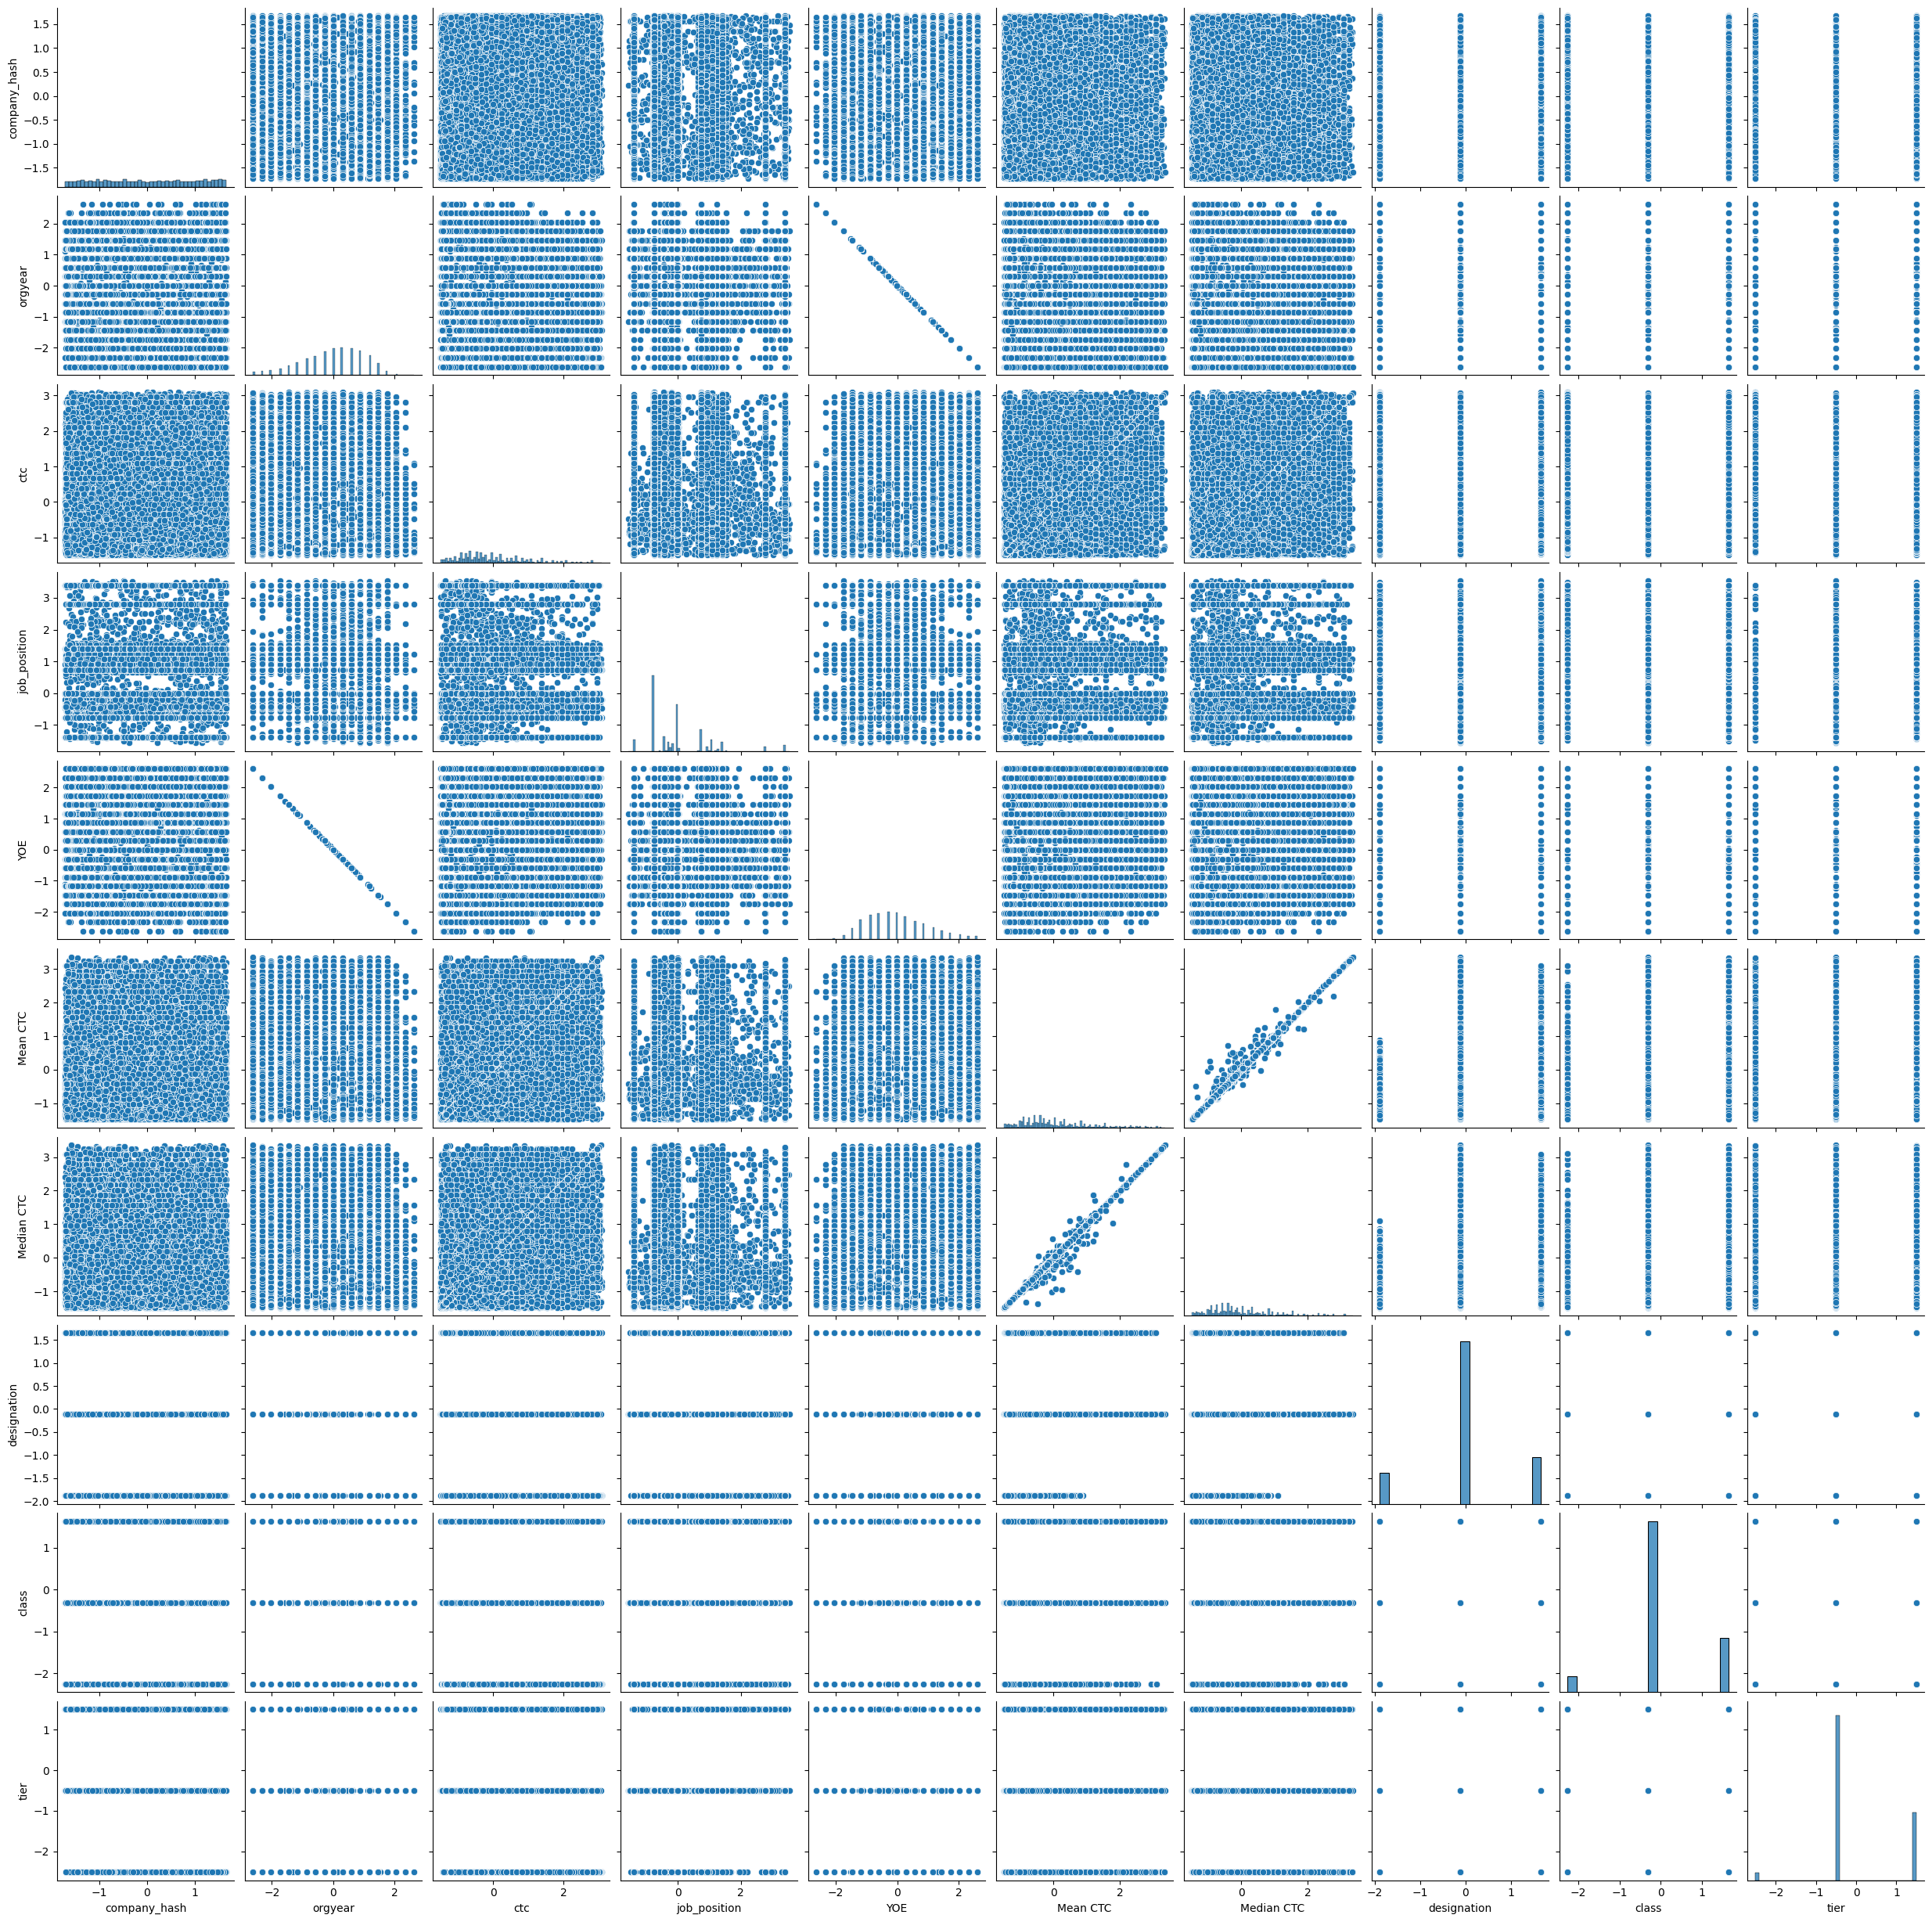

In [ ]:
## checking clustering tendency by using paiplot to randomly have a glance
sns.pairplot(scaled_df)
plt.show()

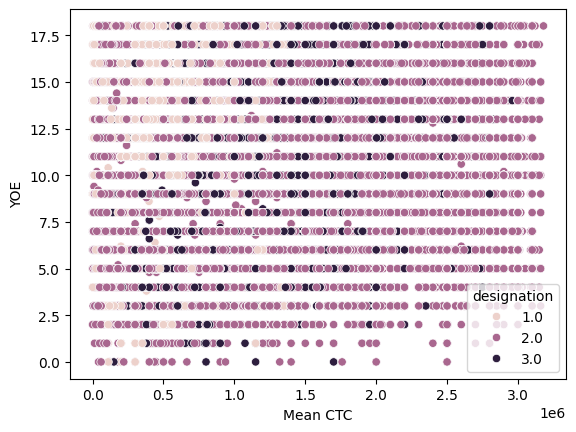

In [ ]:
sns.scatterplot(data = df_3, x= 'Mean CTC', y= 'YOE', hue='designation')
plt.show()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

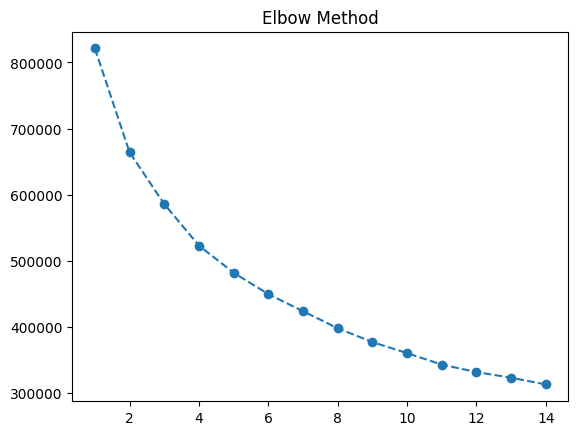

In [ ]:
## implementing elbow method to check what is the feasible clusters we can keep.
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss,  marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel

From the above elbow method we can conclude that any clusters between  2 to 3 are ideal for this dataset.

In [ ]:
scaled_df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'YOE', 'Mean CTC',
       'Median CTC', 'designation', 'class', 'tier'],
      dtype='object')

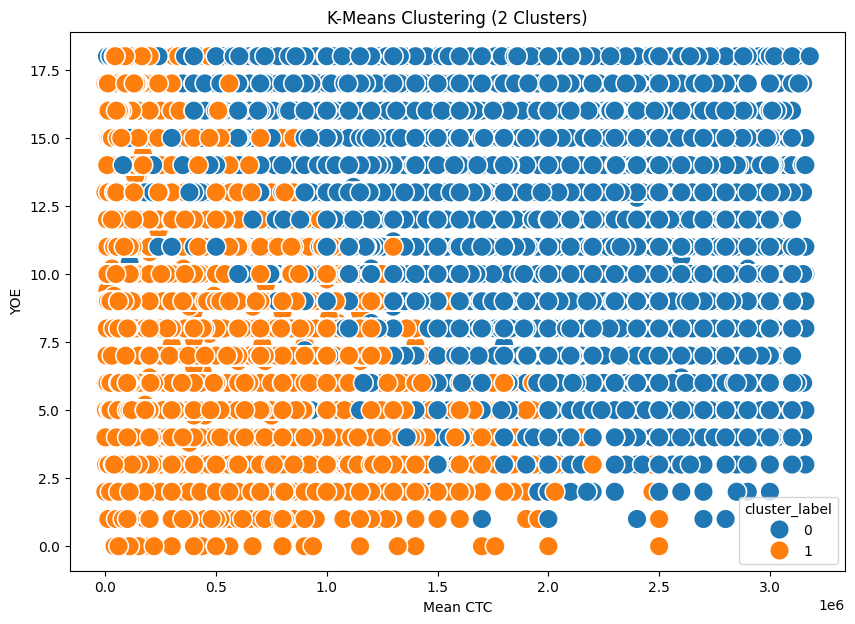

In [ ]:
#implementing elbow method to find the feasible clusters
kmeans = KMeans(n_clusters=2, init="k-means++",random_state=42)
kmeans.fit(scaled_df)

# Assigning cluster labels
final_df['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(y="YOE", x="Mean CTC", hue="cluster_label", data=final_df, s=200)
plt.title("K-Means Clustering (2 Clusters)")
plt.xlabel("Mean CTC")
plt.ylabel("YOE")
plt.show()



In [ ]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
hc_df = scaled_df.sample(n=50, random_state=42)

In [ ]:
hc_df

company_hash   orgyear       ctc  job_position       YOE  Mean CTC  \
26687     -1.372367  1.174894 -0.801906      1.083764 -1.174894 -0.412518   
10054     -0.129951  0.300530  0.087642     -0.000881 -0.300530 -0.342314   
8514       1.503083 -0.282379 -0.055833     -0.031870  0.282379  0.924396   
45912     -0.471468  0.300530 -0.242351     -0.760132 -0.300530 -0.365207   
62779      1.257474 -2.614015  1.809349     -0.760132  2.614015 -0.510192   
21356     -0.803205 -0.282379  1.192404      1.083764  0.282379  1.366982   
15363      0.447993  1.466348 -0.342784     -0.000881 -1.466348  2.786308   
31588      0.847294 -0.865288 -0.644083      1.401409  0.865288 -0.586500   
54493     -0.352706 -0.282379 -0.055833      1.401409  0.282379  0.497072   
73911      0.509170 -1.448197  0.776325      3.392506  1.448197  0.924396   
39956      1.582723  0.591985  0.231118     -0.000881 -0.591985  0.344457   
68188      0.200987  0.300530  1.091971     -0.202315 -0.300530  0.237625   
33600     -0.647117  0.009076 -0.199309     -1.387676 -0.009076  0.115533   
81776      1.645298 -2.614015  1.135014     -0.000881  2.614015  0.268149   
53296      0.087913 -1.448197  0.159380     -0.760132  1.448197 -0.418622   
34140      0.677134  0.591985 -0.801906      0.735128 -0.591985  1.107535   
6279      -0.757596  1.466348 -0.773211     -0.760132 -1.466348 -0.082869   
37053      0.370148 -1.156742 -0.127571      0.897825  1.156742 -0.037083   
73529     -1.566079 -0.282379  2.168037      0.990794  0.282379  0.497072   
22513     -1.154403 -0.282379 -1.131900      0.735128  0.282379  0.390241   
13710      1.587913  0.009076 -0.557998     -0.760132 -0.009076 -0.494930   
70419      1.101186 -1.156742 -0.385827     -1.387676  1.156742 -0.311791   
55345      1.176336 -2.322560  2.096300     -0.465728  2.322560 -0.011138   
67940      1.326835 -0.282379  0.934148     -0.760132  0.282379  0.649688   
4586       1.172743  0.883439 -0.773211      1.083764 -0.883439 -1.451831   
67320     -0.549013  0.591985  1.450660     -0.000881 -0.591985  1.641690   
57583      0.665558 -1.156742  0.231118     -0.031870  1.156742  2.328461   
70238      0.433821 -2.031106  2.526726     -0.202315  2.031106 -0.029452   
53694     -0.160790 -0.282379  1.522398     -0.202315  0.282379  0.451288   
27233      1.083721 -0.865288  1.378922     -0.760132  0.865288  1.260151   
54420      1.176136  0.300530  0.446331     -0.760132 -0.300530  0.497072   
81256     -0.300510  1.757803 -0.342784     -0.760132 -1.757803 -0.266006   
73768      0.718552 -0.865288 -0.271047     -0.326274  0.865288 -0.113391   
46247      1.574140 -0.573833  0.661544     -0.760132  0.573833 -0.723854   
373       -1.102007  0.300530  0.661544      1.230965 -0.300530  2.084276   
77494     -0.189532  0.883439  1.378922     -0.000881 -0.883439  1.563856   
22583     -0.010291  0.300530 -0.629735      0.735128 -0.300530 -0.571238   
32248     -1.695520 -1.448197 -0.773211     -0.000881  1.448197 -0.723854   
78969     -1.056399  1.174894 -0.701473     -0.217809 -1.174894 -0.418622   
54461      1.188911 -0.282379  0.159380      1.401409  0.282379  0.725233   
33821      0.741306  0.883439  0.948495     -0.760132 -0.883439  1.107535   
29514     -0.935540 -0.865288 -1.476241      0.502704  0.865288 -1.471671   
30150     -1.713784 -0.573833 -0.055833      1.401409  0.573833 -1.120655   
25841     -0.001708  0.591985  0.661544     -0.760132 -0.591985  0.802304   
48726      0.380029  0.009076  1.091971      2.788204 -0.009076  1.260151   
37839     -0.355101 -0.282379 -0.055833     -0.760132  0.282379 -0.876469   
30645      1.436116 -0.573833 -0.285394     -1.387676  0.573833 -0.204960   
22924      1.318552 -0.573833 -0.916686     -0.760132  0.573833 -0.876469   
49042     -0.820770 -0.282379  0.575459     -0.000881  0.282379  0.710734   
40343     -1.268874  0.883439  1.235446     -0.217809 -0.883439  0.268149   

       Median CTC  designation     class      tier  
26687   -0.407748    -0.11

In [ ]:
Z = sch.linkage(hc_df, method='ward')

In [ ]:
Z.shape

(49, 4)

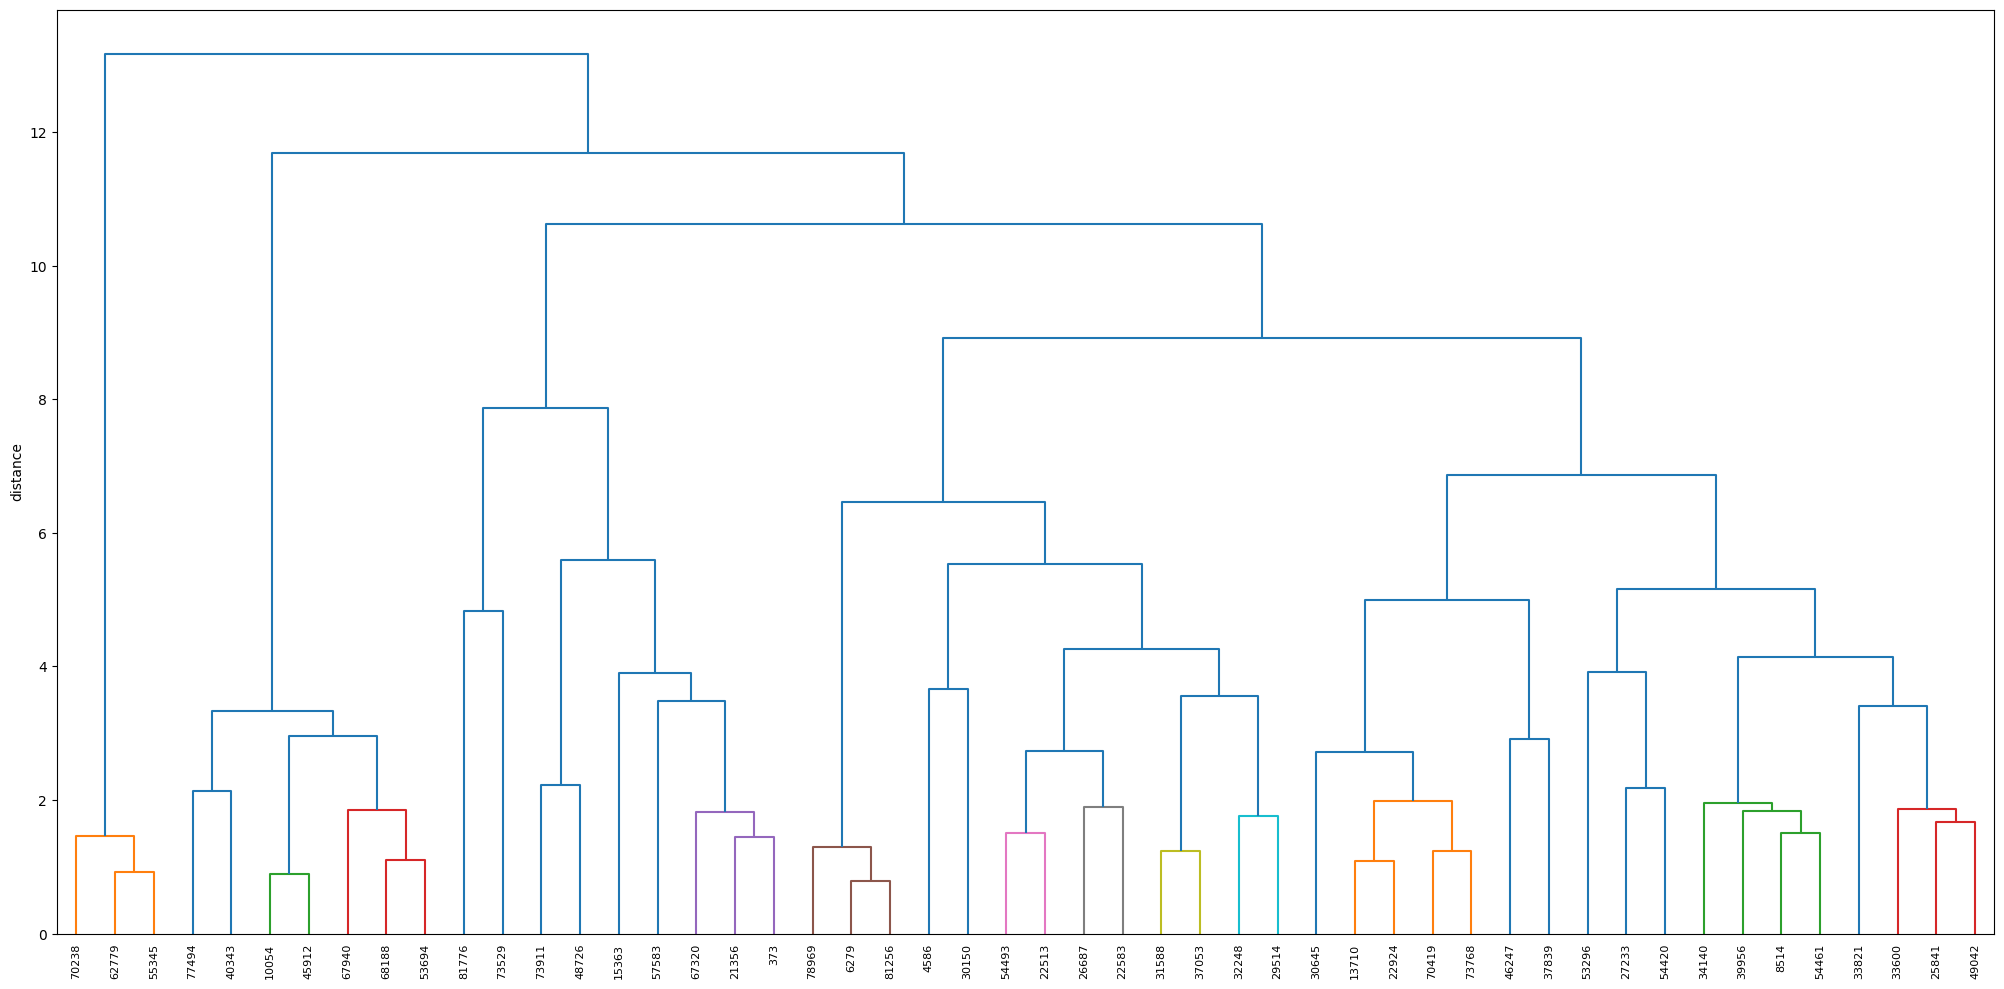

In [ ]:
fig, ax = plt.subplots(figsize=(25, 12))
sch.dendrogram(Z, labels=hc_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
plt.show()

Since the dataset is quite big enough the hierarchiel clustering does not show up properly. But still if we cut the biggest tree we will get aaround 2 clusters which are big enough to handle.

# **Insights:**

1. The majority of learners fall under the 'Other' designation, indicating a diverse range of job positions within the dataset that do not fit into predefined categories.
2. There is a notable presence of learners classified as 'Mid-Level',
suggesting a considerable number of individuals with intermediate-level experience and skills.
3. The count of learners categorized as 'Junior' is comparatively lower, indicating a smaller proportion of individuals in entry-level roles.
4. The majority of learners in the dataset do not meet the specific criteria defined for Classes 1, 2, or 3. This suggests a diverse range of learner profiles and attributes within the dataset.
5. Further analysis could involve examining the characteristics and attributes of learners classified under the 'Other' class to better understand their profiles and any common trends or patterns that emerge.
6. The majority of learners in the dataset do not meet the specific criteria defined for Tier 1, Tier 2, or Tier 3. This suggests a diverse range of learner profiles and compensation levels within the dataset.
7. Further analysis could involve examining the characteristics and attributes of learners classified under the 'Other' tier to better understand their profiles and any common trends or patterns that emerge.

# **Recommendations**
1. The segmentation can help tailor educational offerings, career guidance, and skill development programs to the specific needs and preferences of each segment.
2.High-potential learners can be targeted for specialized training programs, mentorship opportunities, and career advancement initiatives.
3. Identify companies that attract top talent, offer competitive compensation packages, and provide opportunities for career growth. This information can be valuable for job seekers and recruiters alike.